# Distance Metrics

"Why do we need distance metrics in general?

Distance metrics simply define a notion of the "closest" neighbor.

**Assessing similarity or difference**

Distance metrics allow us to measure how different various elements are in a space. 
They can determine whether two things are similar or different, which is crucial in many fields like data analysis, classification, pattern recognition, and recommendation systems.

**Machine learning algorithms**

In machine learning algorithms such as clustering, classification, or anomaly detection, distance metrics are used for model selection, training, and evaluation. 
They assist in choosing the right algorithm and measuring prediction quality.

**Optimization**

For algorithm optimization purposes, distance metrics can be used to minimize or maximize certain objective functions, which is crucial in various domains like machine learning and software engineering.

**Measuring model accuracy**

In tasks such as object detection, image segmentation, or evaluating predictive models, distance metrics like Jaccard distance or IoU are used to assess prediction accuracy against ground truth data,
which is critical in algorithm evaluation.


In 1D, there is no need to have various distance metrics; we just use **Euclidean distance**.
It is so common is use that the majority of people would call it just distance, instead of Euclidean Distance.
The Reason for this is that when asking somebody about distance between two points, they would simply draw a straight line between them.

$$\Large{distance(x_{1}, x_{2}) = | x_{1} - x_{2}|}$$

However, in multiple dimensions, there are defined many interesting distance functions.
A reason to have more metrics than just Euclidean might be straightforwardly a scale problem.
Scale problem is when we have two Vectors, each in different scale, for example in feet and meters.

The simplest reason why there is a need for different weights in each dimension is when we are comparing physical objects, for example, like houses.

| Name    | Bedrooms | Bathrooms | sq.ft. living | sq.ft. lot | floors | years built | year renovated | waterfront |
|---------|----------|-----------|---------------|------------|--------|-------------|----------------|------------|
| House 1 | 3        | 4         | 120           | 160        | 1      | 2013        | 2023           | 1          |
| House 2 | 3        | 4         | 250           | 270        | 2      | 2019        | null           | 0          |

Some features are far more relevant than others.

## Scaled Euclidean Distance

It is a metric that allows us to calculate distance between Vectors in N-Dimensions.
Formally, this is achieved with this formula:

$$\Large{distance(x_{1}, x_{2}) = \sqrt{a_{1}(x_{1}[1] - x_{2}[1])^2 + ... + a_{n}(x_{1}[n] - x_{2}[n])^2  }}$$

As we can see from the formula, each feature has a weight, meaning it is possible to control their importance.
Simply setting $\large{a_{n}}$ to 0 means not impacting distance from this feature difference.
So, using only 1 and 0 is equivalent to feature selection.

Without weights, we have **none-scaled Euclidean Distance** for N-dimension

$$\Large{distance(x_{1}, x_{2}) = \sqrt{(x_{1}[1] - x_{2}[1])^2 + ... + (x_{1}[n] - x_{2}[n])^2  }}$$

In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
def euclidean_distance(x1, x2):
    return np.sqrt((x1 - x2).T.dot((x1 - x2)))

# Test
print(euclidean_distance(np.array([1, 2]), np.array([2, 1])))
print(euclidean_distance(np.array([0, 0]), np.array([1, 1])))
print(euclidean_distance(np.array([1, 1]), np.array([1, 2])))
print(euclidean_distance(np.array([1, 1]), np.array([1, 3])))
print(euclidean_distance(np.array([1, 1]), np.array([2, 2])))

1.4142135623730951
1.4142135623730951
1.0
2.0
1.4142135623730951


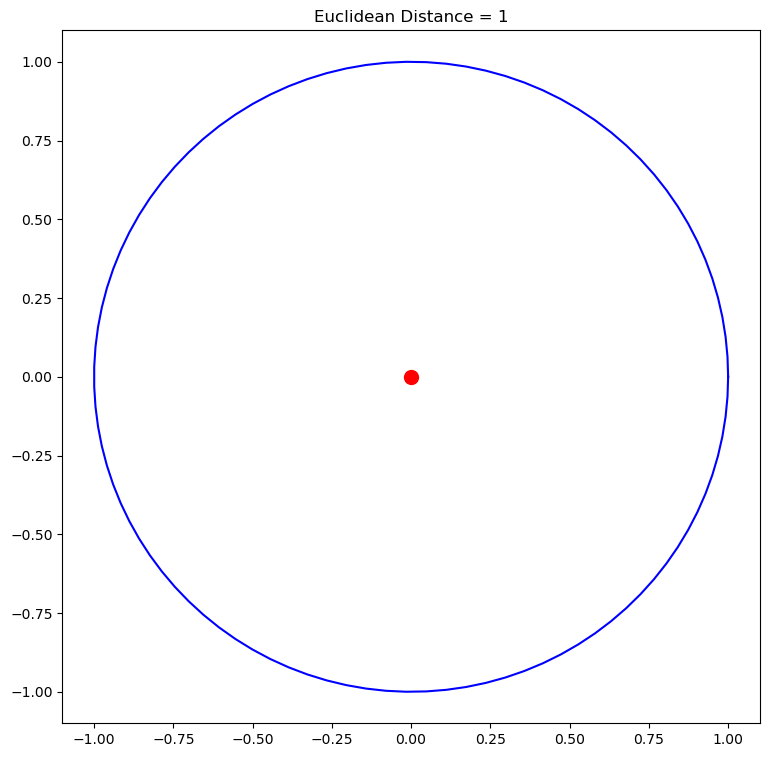

In [60]:
plt.figure(figsize=(9, 9))
plt.title('Euclidean Distance = 1')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

theta = np.linspace(0, 2 * np.pi, 100)
plt.scatter([0], [0], s=100, c='red')
plt.plot(np.cos(theta), np.sin(theta), c='blue')
plt.show()

**This plot makes sense because Euclidean Distance is just a straight line, therefore, it is a radius of a circle.**
## Euclidean Distance from the origin is called L2 Norm

Vectors need to be on the same scale or standardized, so this Norm might be meaningful.
As the number of dimensions rises to something like 10 000, Euclidean Distance doesn't make any sense there.
Mainly because of sensitivity to outlayers or dimensions causing a problem in interpreting distance.
Space is more sparse, and points are more distant, also not enough data to know outlayers

## Manhattan Distance

Thinking about distance as a straight line doesn't work when we want to calculate distance between two points in a city.
We need to do steps, either vertically or horizontally.
Manhattan Distance might be also called as **Taxicab Distance**

$$\Large{distance(x_{1}, x_{2}) = \sum_{i=1}^{n} |x_{1}[i] - x_{2}[i]|}$$

## Manhattan Distance, when talking about distance from origin is called L2 Norm.

The major problem of Manhattan Distance is that it is tough to find a use of it for real life problems apart from finding distance from two real points.

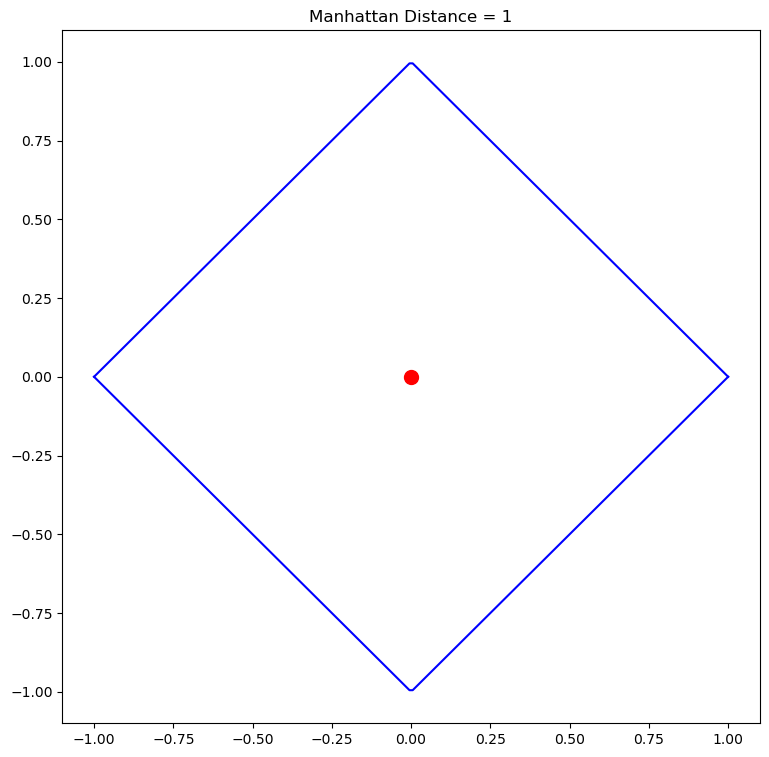

In [69]:
plt.figure(figsize=(9, 9))
plt.title('Manhattan Distance = 1')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

x_plot = np.linspace(-1, 1, 200)
y_plot = [1 - abs(x) for x in x_plot ]
plt.scatter([0], [0], s=100, c='red')
plt.plot(x_plot, y_plot, c='blue')
plt.plot([-x for x in x_plot], [-y for y in y_plot], c='blue')
plt.show()

**$\Large{Green -> Euclidean Distance}$**
**$\Large{Yellow, Red, Blue -> Manhattan Distance}$**

![](Manhattan_distance.png)

In [72]:
def manhattan_distance(x1, x2):
    return sum(abs(x1 - x2))

# Test
print(manhattan_distance(np.array([0, 0]), np.array([1, 1])))
print(manhattan_distance(np.array([0, 0]), np.array([0, 1])))
print(manhattan_distance(np.array([0, 0]), np.array([0, -1])))
print(manhattan_distance(np.array([0, 0]), np.array([1, 0])))
print(manhattan_distance(np.array([2, 0]), np.array([2, -2])))
print(manhattan_distance(np.array([1, 1]), np.array([1, 2])))

2
1
1
1
2
1


# Minkowski Distance

Minkowski distance is a set of different norms, including Euclidean Norm and Manhattan Norm.

<center>L1 Norm Formula:</center>
$$\Large{\sqrt[1]{\sum_{i=1}^{n} |x_{i} - y_{i}|^1}}$$

<center>L2 Norm Formula:</center>
$$\Large{\sqrt[2]{\sum_{i=1}^{n} (x_{i} - y_{i})^2}}$$

As we can see, there is a specific pattern for those two formulas.
In fact, we can change power to any number we want. That's how **Minkowski Distance** was created.

<center>Minkowski Norm Formula:</center>
$$\Large{\sqrt[p]{\sum_{i=1}^{n} |x_{i} - y_{i}|^p}}$$

In [109]:
def minkowski_distance(x1, x2, p):
    return sum([abs(x - y)**p for x, y in zip(x1, x2)])**(1/p)

# Test
print(minkowski_distance(np.array([0, 0]), np.array([1, 1]), 0.5))
print(minkowski_distance(np.array([0, 0]), np.array([1, 1]), 1))  # Manhattan Norm
print(minkowski_distance(np.array([0, 0]), np.array([1, 1]), 2))  # Euclidean Norm
print(minkowski_distance(np.array([0, 0]), np.array([1, 1]), 3))

4.0
2.0
1.4142135623730951
1.2599210498948732


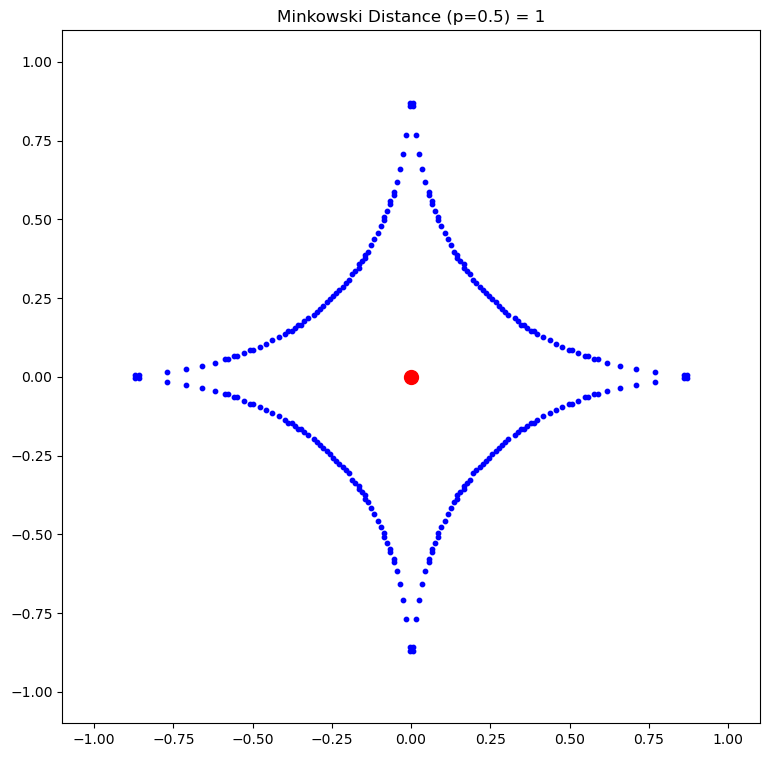

In [132]:
plt.figure(figsize=(9, 9))
plt.title('Minkowski Distance (p=0.5) = 1')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

points = []
for x in np.linspace(-1, 1, 200):
    for y in np.linspace(-1, 1, 200):
        if abs(minkowski_distance(np.array([x, y]), np.array([0, 0]), 0.5) - 1) < 0.01:
            points.append((x ,y))

points = np.array(points) 
plt.scatter([0], [0], s=100, c='red')
plt.scatter(points[:,0], points[:,1], c='blue', s=10)
plt.show()  

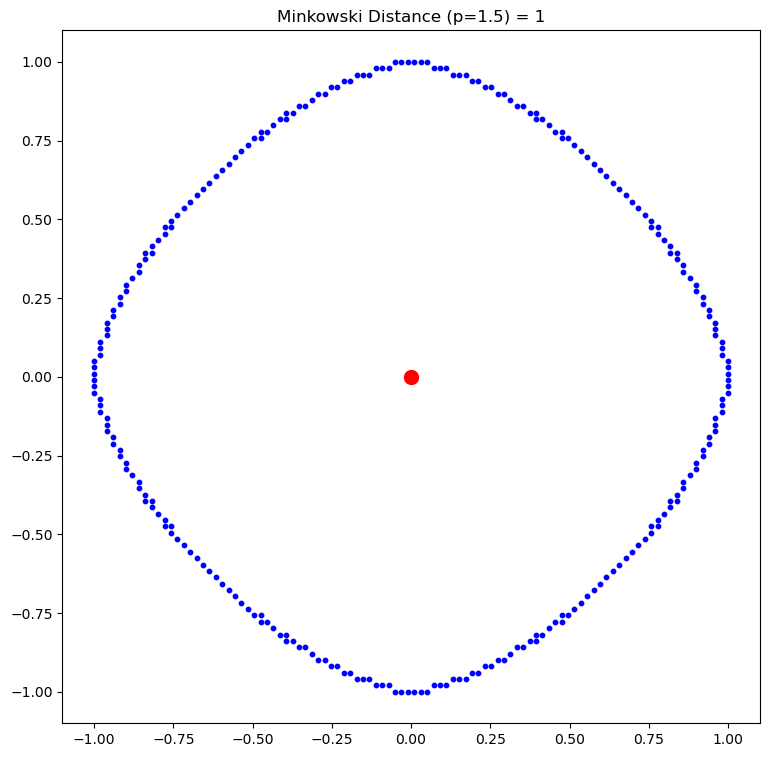

In [130]:
plt.figure(figsize=(9, 9))
plt.title('Minkowski Distance (p=1.5) = 1')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

points = []
for x in np.linspace(-1, 1, 100):
    for y in np.linspace(-1, 1, 100):
        if abs(minkowski_distance(np.array([x, y]), np.array([0, 0]), 1.5) - 1) < 0.01:
            points.append((x ,y))

points = np.array(points)
plt.scatter([0], [0], s=100, c='red')
plt.scatter(points[:,0], points[:,1], c='blue', s=10)
plt.show()  

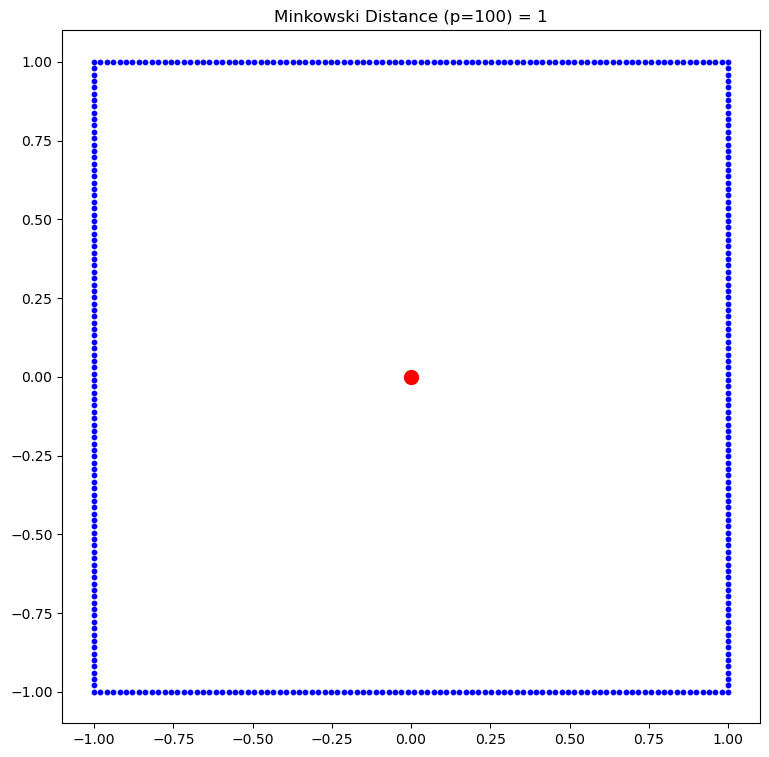

In [141]:
plt.figure(figsize=(9, 9))
plt.title('Minkowski Distance (p=100) = 1')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

points = []
for x in np.linspace(-1, 1, 100):
    for y in np.linspace(-1, 1, 100):
        if abs(minkowski_distance(np.array([x, y]), np.array([0, 0]), 100) - 1) < 0.01:
            points.append((x ,y))

points = np.array(points)
plt.scatter([0], [0], s=100, c='red')
plt.scatter(points[:,0], points[:,1], c='blue', s=10)
plt.show()  

# Chebyshev Distance

If we set p as infinity in Minkowski Norm, we actually get a **Chebyshev Norm**.
Cheybyshev Distance value is always the absolute value in a Vector.

A simple use case for this norm is when we look only at positive x and y.
For example, they mean a load that our server has to take from two clients.
In this case, Cheybyshev Distance is the minimum load server should operate.

In Another case, Cheybyshev Distance tells us how many moves a King in chess has to make to get to a specific place.


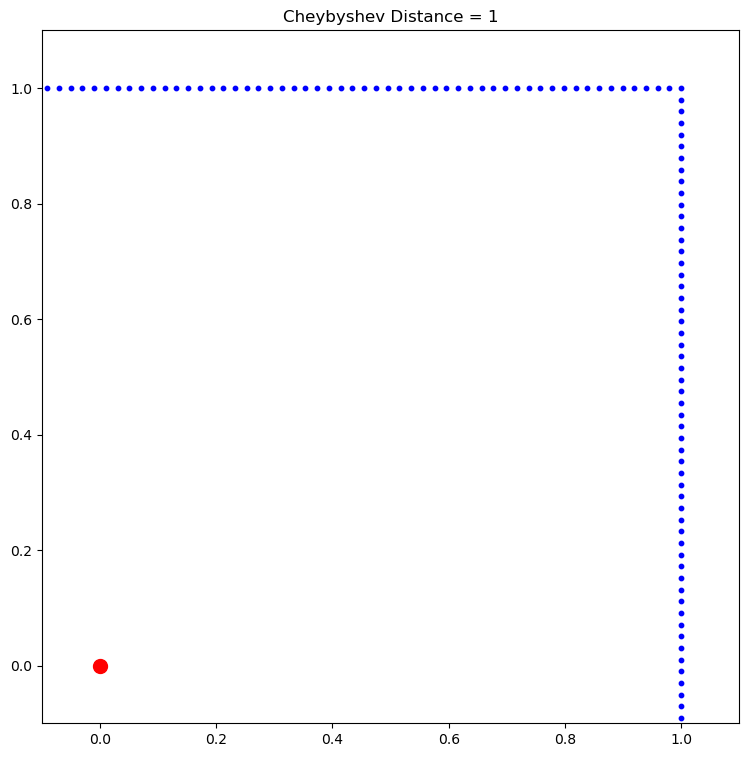

In [144]:
plt.figure(figsize=(9, 9))
plt.title('Cheybyshev Distance = 1')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

points = []
for x in np.linspace(-1, 1, 100):
    for y in np.linspace(-1, 1, 100):
        if abs(minkowski_distance(np.array([x, y]), np.array([0, 0]), 100) - 1) < 0.01:
            points.append((x ,y))

points = np.array(points)
plt.scatter([0], [0], s=100, c='red')
plt.scatter(points[:,0], points[:,1], c='blue', s=10)
plt.show()  

![](Minkowski_distance_examples.png)

# Cosine Distance

Probably the second most used Metric in the Data Science World, just after Euclidean Norm. The third most used is probably Manhattan Norm.
Cosine Similarity is a distance measure used to define similarity between two Vectors.
It is an angular measure that used angle between vectors, not their length.

In general -1 < Cosine Similarity < 1

Cosine Similarity = 1 - Cosine Distance

Cosine Distance = 1 - Cosine Similarity

If actually distance between Vectors really matters, cosine distance is not a good option to go.
But if only an angle or ratio matters, it is the best choice.

A real life scenario is when we need to compare sport teams.
Team A has 100 wins and 100 loses, Team B has 200 wins and 200 loses.
Using Cosine Similarity, they would be the same, and that makes sense.

The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:

$$\Large{A \cdot B = ||A|| * ||B|| * cos(\theta) }$$

<br/>
<center>Cosine Similarity</center>
$$\Large{S_{C}(A, B) := cos(\theta) = \frac{A \cdot B}{||A|| * ||B||} = \frac{\sum_{i-1}^n A_{i}*B_{i}}{\sqrt{\sum_{i=1}^n A_{i}^2} \cdot \sqrt{\sum_{i=1}^n B_{i}^2} }}$$

In [267]:
def cosine_similarity(a, b):
    return a.dot(b) / (sum(a**2)**(1/2) * sum(b**2)**(1/2))

# Test

print(cosine_similarity(np.array([1, 2]), np.array([-1, -2])))
print(cosine_similarity(np.array([1, 2]), np.array([1, 2])))
print(cosine_similarity(np.array([2, 5]), np.array([4, 10])))
print(cosine_similarity(np.array([1, 2]), np.array([1, -2])))
print(cosine_similarity(np.array([1, 2]), np.array([-1, 3])))
    

-0.9999999999999998
0.9999999999999998
1.0000000000000002
-0.5999999999999999
0.7071067811865475


In [264]:
def plot_cosine_similarity(similarity):
    plt.figure(figsize=(8, 8))
    plt.title(f'Cosine Similarity = {similarity}')
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    x_vector, y_vector = 0.5, 0.5
    
    points = []
    for x in np.linspace(-1, 1, 100):
        for y in np.linspace(-1, 1, 100):
            if np.isclose(cosine_similarity(np.array([x, y]), np.array([x_vector, y_vector])), similarity):
                points.append((x ,y))
    
    points = np.array(points)
    plt.scatter([0], [0], s=100, c='red')
    plt.arrow(0, 0, x_vector, y_vector,head_width=0.1,  fc='white', ec='red')
    plt.scatter(points[:,0], points[:,1], c='blue', s=10)
    plt.show()

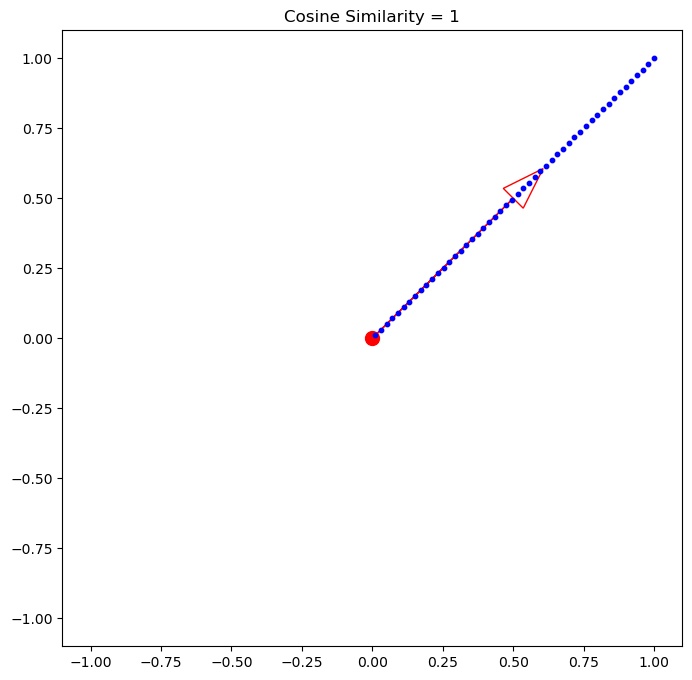

In [218]:
plot_cosine_similarity(1)

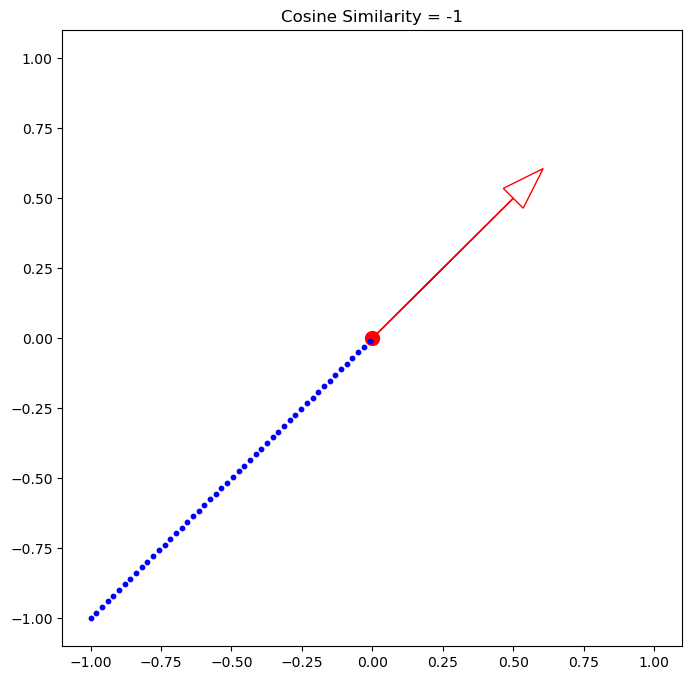

In [265]:
plot_cosine_similarity(-1)

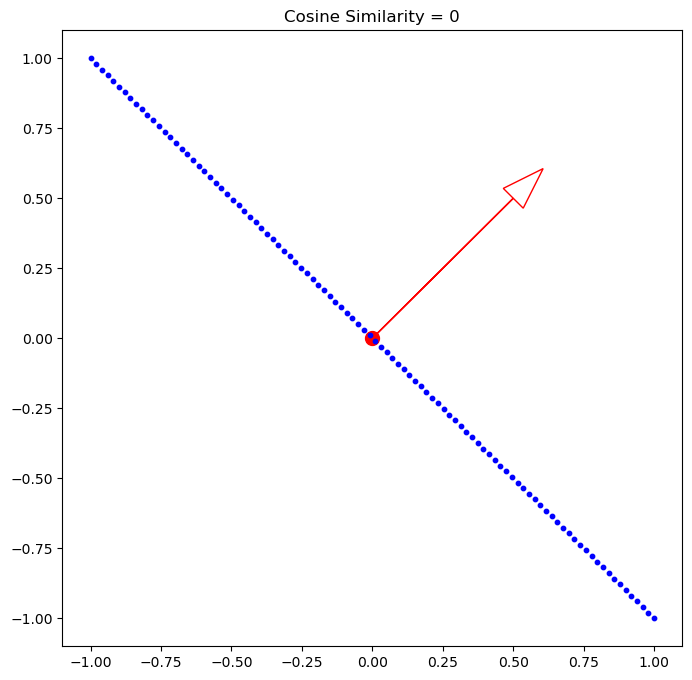

In [266]:
plot_cosine_similarity(0)

# Hamming Distance

If we have two Vectors, hamming distance is the number of elements in specific indices that are different from each other.

Example:

|K|A|**R**|**O**|**L**|I|N

|K|A|**T**|**H**|**R**|I|N

Hamming Distance between Karolin and Kathrin is 3
Hamming Distance between 0000 and 1111 is 4

The minimum hamming distance is used to define some essential notions in coding theory, such as error detecting and error correcting codes.

In [6]:
def hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length!")
    sum = 0
    for x, y in zip(seq1, seq2):
        if x != y: sum += 1
        
    return sum
        
# Test
print(hamming_distance('karolin', 'kathrin'))
print(hamming_distance('0000', '1111'))
print(hamming_distance('2173896', '2233796'))
print(hamming_distance([1, 2, 3, 5, 4, 6], [1, 2, 5, 6, 6, 9]))

3
4
3
4


# Haversine Distance

The Haversine distance is a formula used to calculate the distance between two points on the surface of a sphere.

Obvious use case, when working with actual geospace data and straight line doesn't make any sense.

It is particularly useful in determining the distance between two locations on a map when given their latitude and longitude.

<center>Formula</center>
$$\Large{distane(A, B) = R * c }$$
$$\Large{c =  2 * atan2(\sqrt{a}, \sqrt{1 - a)}}$$
$$\Large{a = \sin^2(\frac{\phi B - \phi A}{2}) + \cos(\phi A) * \cos(\phi B) * \sin^2(\frac{\lambda B - \lambda A)}{2})}$$

where:

R — radius of the sphere (for example, Earth's radius)

$\phi$ - latitude

$\lambda$ - longitude


![](haversine.png)

In [25]:
import math

def haversine_distance(pointA, pointB):
        lat1, long1, = pointA
        lat2, long2, = pointB

        R = 6371000  # radius of Earth in meters
        phi_1 = math.radians(lat1)
        phi_2 = math.radians(lat2)

        delta_phi = math.radians(lat2 - lat1)
        delta_lambda = math.radians(long2 - long1)
        
        a = math.sin(delta_phi/2)**2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda/2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        
        return R * c / 1000  # in kilometers

# Test
print(haversine_distance([52.22977, 21.01178], [52.520008, 13.404954]))  # Distance between Warsaw and Berlin in km
print(haversine_distance([41.507483, -99.436554], [38.504048, -98.315949]))  # Distance between NEBRASKA, USA and KANSAS, USA
        

517.145756072439
347.32834803942615


# Jaccard Distance

The Jaccard distance is a measure of dissimilarity between two sets, often used to calculate the dissimilarity or similarity between sets irrespective of their size.
It is determined as the complement of the Jaccard similarity coefficient. 

The formula for Jaccard distance between two sets A and B is given by:

<center>Formula</center>
$$\Large{distance(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|}}$$

Jaccard distance ranges between 0 and 1, where 0 means sets are identical and 1 means sets don't have any similarity.

It is commonly used in various fields like natural language processing, data analysis, recommender systems to evaluate the similarity between sets of elements, 
such as text documents, tags, or items in recommendation systems.

It can be even used for object detection in computer vision. (Predicting bounding box)

In [14]:
def jaccard_distance(A, B):
    return 1 - len(set(A).intersection(set(B))) / len(set(A).union(set(B)))


# Test
print(jaccard_distance([1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5]))
print(jaccard_distance([5, 7, 8, 9], [1, 2, 3, 6, 7]))
print(jaccard_distance([1, 2, 3], [1, 2, 5]))
print(jaccard_distance(['dog', 'cat', 'pig', 'cow', 'horse', 'rabbit'], ['bee', 'dog', 'cat', 'cow', 'lizard', 'pigeon', 'rabbit']))
print(jaccard_distance(['dog', 'cat', 'pig', 'cow', 'horse', 'rabbit'], ['bee', 'pigeon', 'lizard', 'pigeon']))


0.2857142857142857
0.875
0.5
0.5555555555555556
1.0


![](iou.png)

![](iou_2.png)